In [1]:
import pandas as pd

In [2]:
from labdai.data_loaders import load_market_data
from labdai.utils import price_to_returns
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [3]:
d1 = pd.read_csv('data/SPX/capitalization_mat.csv', index_col=0)

In [4]:
d1

,SLVM UN Equity,CTRA UN Equity,MTCH UW Equity,BBWI UN Equity,BBWI-W UN Equity,VSCO UN Equity,MRNA UW Equity,OGN UN Equity,9993232D UW Equity,HON UW Equity,...,OKE UN Equity,HON UN Equity,PDG UN Equity,CCTYQ UN Equity,RBK UN Equity,EKDKQ UN Equity,TNB UN Equity,ORCL UQ Equity,GD UN Equity,1312089D UN Equity
20021230,NaN,787.257019,NaN,7302.990234,NaN,NaN,NaN,NaN,NaN,NaN,...,1151.310059,18449.000000,4469.640137,1517.140015,1765.199951,NaN,982.288025,57644.101562,15869.700195,8485.400391
20021231,NaN,787.893005,NaN,7287.290039,NaN,NaN,NaN,NaN,NaN,NaN,...,1160.380005,19705.199219,4560.859863,1559.160034,1762.800049,NaN,985.202026,56906.398438,15948.099609,8439.900391
20030101,NaN,787.893005,NaN,7287.290039,NaN,NaN,NaN,NaN,NaN,NaN,...,1160.380005,19705.199219,4560.859863,1559.160034,1762.800049,NaN,985.202026,56906.398438,15948.099609,8439.900391
20030102,NaN,815.237000,NaN,7323.910156,NaN,NaN,NaN,NaN,NaN,NaN,...,1177.910034,20509.800781,4529.129883,1559.160034,1851.540039,NaN,1034.750000,59066.800781,16255.500000,8929.009766
20030103,NaN,805.062012,NaN,7010.029785,NaN,NaN,NaN,NaN,NaN,NaN,...,1176.699951,20321.000000,4738.859863,1487.719971,1828.750000,NaN,1026.589966,60911.000000,16315.799805,8894.879883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,NaN,10249.099609,NaN,7178.009766,NaN,NaN,4819.089844,NaN,11001.599609,NaN,...,21933.800781,97399.703125,NaN,NaN,NaN,NaN,NaN,NaN,45938.800781,NaN
20181228,NaN,9895.580078,NaN,7004.680176,NaN,NaN,4654.620117,NaN,10975.799805,NaN,...,21793.900391,96800.101562,NaN,NaN,NaN,NaN,NaN,NaN,45998.000000,NaN
20181229,NaN,9895.580078,NaN,7004.680176,NaN,NaN,4654.620117,NaN,10975.799805,NaN,...,21793.900391,96800.101562,NaN,NaN,NaN,NaN,NaN,NaN,45998.000000,NaN
20181230,NaN,9895.580078,NaN,7004.680176,NaN,NaN,4654.620117,NaN,10975.799805,NaN,...,21793.900391,96800.101562,NaN,NaN,NaN,NaN,NaN,NaN,45998.000000,NaN


In [5]:
a = list(d1.columns)
a

['SLVM UN Equity',
 'CTRA UN Equity',
 'MTCH UW Equity',
 'BBWI UN Equity',
 'BBWI-W UN Equity',
 'VSCO UN Equity',
 'MRNA UW Equity',
 'OGN UN Equity',
 '9993232D UW Equity',
 'HON UW Equity',
 'NXPI UW Equity',
 '9990302D US Equity',
 '9990302D UW Equity',
 'CXO US Equity',
 'TSLA UW Equity',
 'AIRC UN Equity',
 'VTRS UW Equity',
 '1844053D US Equity',
 'HST UW Equity',
 'VNT UN Equity',
 'NBL US Equity',
 'ETFC US Equity',
 'AEP UW Equity',
 'LUMN UN Equity',
 'APA UW Equity',
 'ENPH UQ Equity',
 'DXCM UW Equity',
 'HWM UN Equity',
 'RTX UN Equity',
 'CARR UN Equity',
 'OTIS UN Equity',
 'GNRC UN Equity',
 'CDAY UN Equity',
 'VIAC UW Equity',
 'BKR UN Equity',
 'WCG US Equity',
 'NOW UN Equity',
 'PEAK UN Equity',
 'PAYC UN Equity',
 'VIAC UN Equity',
 'NBL UW Equity',
 'NLOK UW Equity',
 'J UN Equity',
 'TFC UN Equity',
 'VAR US Equity',
 'LVS UN Equity',
 'EXC UW Equity',
 'ETSY UW Equity',
 'CDW UW Equity',
 'TSS US Equity',
 'GL UN Equity',
 'VAL UN Equity',
 'TMUS UW Equity',
 

In [6]:
a.sort()

In [7]:
d1.describe()

,SLVM UN Equity,CTRA UN Equity,MTCH UW Equity,BBWI UN Equity,BBWI-W UN Equity,VSCO UN Equity,MRNA UW Equity,OGN UN Equity,9993232D UW Equity,HON UW Equity,...,OKE UN Equity,HON UN Equity,PDG UN Equity,CCTYQ UN Equity,RBK UN Equity,EKDKQ UN Equity,TNB UN Equity,ORCL UQ Equity,GD UN Equity,1312089D UN Equity
count,0.0,5846.000000,0.0,5846.000000,0.0,0.0,25.000000,0.0,3759.000000,0.0,...,5846.000000,5846.000000,1202.000000,2188.000000,1166.000000,0.0,3463.000000,3934.000000,5846.000000,1287.000000
mean,NaN,6789.984095,NaN,12255.073698,NaN,NaN,5369.091250,NaN,11344.911472,NaN,...,7914.149131,53718.003385,6886.666532,2479.753198,2439.524043,NaN,2190.585350,104699.238967,32609.912265,8330.404232
std,NaN,4706.019584,NaN,5904.894824,NaN,NaN,659.111389,NaN,4777.824776,NaN,...,6218.691728,27990.734945,1723.929240,1326.727579,535.021976,NaN,799.266560,35578.741018,13423.362456,815.639313
min,NaN,722.711975,NaN,2016.489990,NaN,NaN,4447.379883,NaN,1518.680054,NaN,...,1031.650024,17078.300781,3650.270020,171.488007,1714.829956,NaN,801.570007,50983.898438,10522.900391,6628.080078
25%,NaN,2611.679932,NaN,8488.029541,NaN,NaN,4759.879883,NaN,7335.955078,NaN,...,3502.340088,31434.099609,5738.312378,1342.805023,2028.500000,NaN,1522.040039,68820.525391,22967.875000,7591.350098
50%,NaN,5477.430176,NaN,10502.600098,NaN,NaN,5322.379883,NaN,11268.400391,NaN,...,5579.640137,43465.750000,6786.939941,2582.135010,2303.904907,NaN,2110.479980,101216.000000,27850.950195,8436.110352
75%,NaN,10944.099609,NaN,14744.900391,NaN,NaN,6026.330078,NaN,15182.750000,NaN,...,9950.002441,75791.675781,7714.077637,3278.100098,2557.469971,NaN,2865.464966,139188.250000,42154.901367,9040.559570
max,NaN,17557.699219,NaN,29101.800781,NaN,NaN,6184.220215,NaN,22520.599609,NaN,...,29350.800781,125693.000000,11240.299805,5539.350098,3529.810059,NaN,3803.429932,184051.000000,68279.898438,9886.459961


In [8]:
d1.isnull().sum().sort_values()

XLNX UW Equity        0
LLL UN Equity         0
DGX UN Equity         0
SBUX UQ Equity        0
VIAV UQ Equity        0
                   ... 
WCOEQ UQ Equity    5846
GPUI UN Equity     5846
ENRNQ UN Equity    5846
CITGQ UN Equity    5846
SLVM UN Equity     5846
Length: 1145, dtype: int64

In [9]:
d1n = d1.dropna(axis=1)
d1n

,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,VIAC UW Equity,BKR UN Equity,PEAK UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
20021230,787.257019,7302.990234,8256.490234,2148.399902,1702.859985,4194.100098,29102.000000,70366.703125,10738.700195,2251.239990,...,16153.200195,282025.0,24225.199219,11806.700195,8073.410156,15649.900391,7903.200195,1151.310059,18449.000000,15869.700195
20021231,787.893005,7287.290039,8204.660156,2151.270020,1764.579956,4189.819824,29338.800781,71789.101562,10805.799805,2260.090088,...,16168.200195,276411.0,24440.000000,11793.500000,8165.049805,15736.000000,8019.620117,1160.380005,19705.199219,15948.099609
20030101,787.893005,7287.290039,8204.660156,2151.270020,1764.579956,4189.819824,29338.800781,71789.101562,10805.799805,2260.090088,...,16168.200195,276411.0,24440.000000,11793.500000,8165.049805,15736.000000,8019.620117,1160.380005,19705.199219,15948.099609
20030102,815.237000,7323.910156,8537.230469,2191.370117,1851.719971,4322.450195,30035.099609,75914.000000,11205.299805,2247.100098,...,16567.699219,287211.0,25026.500000,12225.799805,8370.160156,16434.699219,8097.229980,1177.910034,20509.800781,16255.500000
20030103,805.062012,7010.029785,8506.990234,2189.649902,1822.670044,4301.049805,30508.800781,75727.101562,10926.700195,2295.489990,...,16549.800781,287586.0,24852.300781,11973.799805,8282.879883,16324.500000,8148.959961,1176.699951,20321.000000,16315.799805
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,10249.099609,7178.009766,10149.000000,9068.200195,11054.299805,16480.099609,91311.500000,16227.599609,22230.500000,13278.799805,...,42033.199219,782012.0,50317.101562,116996.000000,23092.599609,74748.796875,22964.000000,21933.800781,97399.703125,45938.800781
20181228,9895.580078,7004.680176,9997.179688,8842.700195,11067.000000,16501.699219,90948.898438,16246.299805,22189.099609,13312.299805,...,41500.699219,775906.0,50691.000000,116472.000000,23180.199219,74123.296875,22863.099609,21793.900391,96800.101562,45998.000000
20181229,9895.580078,7004.680176,9997.179688,8842.700195,11067.000000,16501.699219,90948.898438,16246.299805,22189.099609,13312.299805,...,41500.699219,775906.0,50691.000000,116472.000000,23180.199219,74123.296875,22863.099609,21793.900391,96800.101562,45998.000000
20181230,9895.580078,7004.680176,9997.179688,8842.700195,11067.000000,16501.699219,90948.898438,16246.299805,22189.099609,13312.299805,...,41500.699219,775906.0,50691.000000,116472.000000,23180.199219,74123.296875,22863.099609,21793.900391,96800.101562,45998.000000


In [10]:
d2 = pd.read_csv('data/SPX/close_mat.csv', index_col=0)
d2

,SLVM UN Equity,CTRA UN Equity,MTCH UW Equity,BBWI UN Equity,BBWI-W UN Equity,VSCO UN Equity,MRNA UW Equity,OGN UN Equity,9993232D UW Equity,HON UW Equity,...,OKE UN Equity,HON UN Equity,PDG UN Equity,CCTYQ UN Equity,RBK UN Equity,EKDKQ UN Equity,TNB UN Equity,ORCL UQ Equity,GD UN Equity,1312089D UN Equity
20021230,NaN,2.063300,NaN,11.282300,NaN,NaN,NaN,NaN,NaN,NaN,...,8.338700,21.391500,11.27,7.22,29.440001,35.529999,16.850000,10.94,39.490002,22.379999
20021231,NaN,2.065000,NaN,11.258000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.404401,22.848000,11.50,7.42,29.400000,35.040001,16.900000,10.80,39.685001,22.260000
20030101,NaN,2.065000,NaN,11.258000,NaN,NaN,NaN,NaN,NaN,NaN,...,8.404401,22.848000,11.50,7.42,29.400000,35.040001,16.900000,10.80,39.685001,22.260000
20030102,NaN,2.136700,NaN,11.314600,NaN,NaN,NaN,NaN,NaN,NaN,...,8.531300,23.781000,11.42,7.42,30.879999,35.840000,17.750000,11.21,40.450001,23.549999
20030103,NaN,2.110000,NaN,10.829700,NaN,NaN,NaN,NaN,NaN,NaN,...,8.522599,23.562000,11.73,7.08,30.500000,37.430000,17.610001,11.56,40.599998,23.459999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,NaN,23.770000,NaN,21.085501,NaN,NaN,14.65,NaN,38.439999,NaN,...,53.320000,131.570007,NaN,NaN,NaN,NaN,NaN,NaN,155.119995,NaN
20181228,NaN,22.950001,NaN,20.576401,NaN,NaN,14.15,NaN,38.349998,NaN,...,52.980000,130.759995,NaN,NaN,NaN,NaN,NaN,NaN,155.320007,NaN
20181229,NaN,22.950001,NaN,20.576401,NaN,NaN,14.15,NaN,38.349998,NaN,...,52.980000,130.759995,NaN,NaN,NaN,NaN,NaN,NaN,155.320007,NaN
20181230,NaN,22.950001,NaN,20.576401,NaN,NaN,14.15,NaN,38.349998,NaN,...,52.980000,130.759995,NaN,NaN,NaN,NaN,NaN,NaN,155.320007,NaN


In [11]:
d2n = d2.dropna(axis=1)
d2n


,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,BKR UN Equity,PEAK UN Equity,VIAC UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
20021230,2.063300,11.282300,27.3095,9.3750,46.900002,29.410000,18.118999,31.990000,17.365200,29.472000,...,54.169998,26.375000,20.860001,5.565000,9.250000,22.735001,12.220000,8.338700,21.391500,39.490002
20021231,2.065000,11.258000,27.1381,9.3875,48.599998,29.379999,18.267000,32.189999,17.433500,30.069000,...,54.220001,25.850000,21.045000,5.558800,9.355000,22.860001,12.400000,8.404401,22.848000,39.685001
20030101,2.065000,11.258000,27.1381,9.3875,48.599998,29.379999,18.267000,32.189999,17.433500,30.069000,...,54.220001,25.850000,21.045000,5.558800,9.355000,22.860001,12.400000,8.404401,22.848000,39.685001
20030102,2.136700,11.314600,28.2381,9.5625,51.000000,30.309999,18.700001,33.380001,17.333302,31.802999,...,55.560001,26.860001,21.549999,5.762500,9.590000,23.875000,12.520000,8.531300,23.781000,40.450001
20030103,2.110000,10.829700,28.1381,9.5550,50.200001,30.160000,18.995001,32.549999,17.706600,31.722000,...,55.500000,26.895000,21.400000,5.643800,9.490000,23.715000,12.600000,8.522599,23.562000,40.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20181227,23.770000,21.085501,26.7400,18.9000,43.480000,15.250000,62.379002,21.480000,27.809999,43.369999,...,161.020004,101.180000,36.330002,73.669998,26.360001,126.669998,40.959999,53.320000,131.570007,155.119995
20181228,22.950001,20.576401,26.3400,18.4300,43.529999,15.270000,62.131001,21.440001,27.879999,43.410000,...,158.979996,100.389999,36.599998,73.339996,26.459999,125.610001,40.779999,52.980000,130.759995,155.320007
20181229,22.950001,20.576401,26.3400,18.4300,43.529999,15.270000,62.131001,21.440001,27.879999,43.410000,...,158.979996,100.389999,36.599998,73.339996,26.459999,125.610001,40.779999,52.980000,130.759995,155.320007
20181230,22.950001,20.576401,26.3400,18.4300,43.529999,15.270000,62.131001,21.440001,27.879999,43.410000,...,158.979996,100.389999,36.599998,73.339996,26.459999,125.610001,40.779999,52.980000,130.759995,155.320007


In [12]:
# calcoliamo il range interquantile
Q1 = d2n.quantile(0.25)
Q3 = d2n.quantile(0.75)
IQR = Q3 - Q1
# rimuoviamo i valori fuoi dal range interquanitle*1.5
d2n = d2n[~((d2n < (Q1 - 1.5 * IQR)) |(d2n > (Q3 + 1.5 * IQR))).any(axis=1)] 
d2n.describe()

,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,BKR UN Equity,PEAK UN Equity,VIAC UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
count,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,...,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000,1590.000000
mean,14.744877,27.126969,84.572389,38.161840,33.766827,35.621327,42.249983,46.364094,32.125435,25.868887,...,87.640195,27.825598,63.706660,20.434756,31.486903,71.642019,28.611761,26.231578,48.020068,65.968245
std,9.581604,11.932328,18.579234,13.701236,49.832162,3.678528,8.965850,8.639362,6.972162,12.517768,...,13.724425,4.060483,15.167652,8.112682,8.657050,21.190708,5.343831,11.681106,14.643848,11.863085
min,3.233300,6.869600,34.380001,12.347500,7.180000,23.959999,26.042999,28.250000,17.961500,6.110000,...,50.049999,19.120001,29.455000,8.663800,13.650000,31.700001,15.290000,9.179200,26.065802,47.025002
25%,7.720000,17.838624,76.412500,30.393750,9.980000,33.230000,36.259001,41.090000,25.813376,14.440000,...,80.712500,25.382499,58.099998,14.517500,26.340000,53.397499,26.750000,15.794350,35.926149,60.299999
50%,10.232500,23.425250,86.915001,38.622499,14.330000,35.110001,43.002998,44.730000,31.885550,25.524000,...,87.410000,27.400000,66.529999,20.266250,31.760000,75.519997,28.910000,21.714099,43.554100,65.879997
75%,20.477500,37.127998,97.727503,47.195000,17.125000,38.490002,47.082000,48.840000,37.716400,33.249999,...,93.150002,29.750000,73.847500,24.639999,36.410000,87.227503,31.570000,37.858000,56.575101,69.559998
max,39.930000,75.718796,126.610001,73.279999,232.500000,45.130001,69.639000,85.500000,48.522499,60.299999,...,161.410004,54.160000,100.940002,65.239998,60.500000,116.199997,45.020000,60.820000,101.360001,144.289993


filter columns

In [13]:
d1n.columns

Index(['CTRA UN Equity', 'BBWI UN Equity', '9990302D US Equity',
       'NBL US Equity', 'ETFC US Equity', 'LUMN UN Equity', 'RTX UN Equity',
       'VIAC UW Equity', 'BKR UN Equity', 'PEAK UN Equity',
       ...
       'FDX UN Equity', 'MSFT UQ Equity', 'SLB UN Equity', 'NKE UN Equity',
       'HAL UN Equity', 'CAT UN Equity', 'ADM UN Equity', 'OKE UN Equity',
       'HON UN Equity', 'GD UN Equity'],
      dtype='object', length=558)

In [14]:
d2n.columns

Index(['CTRA UN Equity', 'BBWI UN Equity', '9990302D US Equity',
       'NBL US Equity', 'ETFC US Equity', 'LUMN UN Equity', 'RTX UN Equity',
       'BKR UN Equity', 'PEAK UN Equity', 'VIAC UN Equity',
       ...
       'FDX UN Equity', 'MSFT UQ Equity', 'SLB UN Equity', 'NKE UN Equity',
       'HAL UN Equity', 'CAT UN Equity', 'ADM UN Equity', 'OKE UN Equity',
       'HON UN Equity', 'GD UN Equity'],
      dtype='object', length=541)

In [15]:
namesok = []
for el in d1n.columns:
    for el2 in d2n.columns:
        if el == el2:
            namesok.append(el)

In [16]:
namesok

['CTRA UN Equity',
 'BBWI UN Equity',
 '9990302D US Equity',
 'NBL US Equity',
 'ETFC US Equity',
 'LUMN UN Equity',
 'RTX UN Equity',
 'BKR UN Equity',
 'PEAK UN Equity',
 'VIAC UN Equity',
 'NLOK UW Equity',
 'J UN Equity',
 'TFC UN Equity',
 'TSS US Equity',
 'GL UN Equity',
 'VAL UN Equity',
 'BRO UN Equity',
 'TDY UN Equity',
 'IEX UN Equity',
 'TECH UW Equity',
 'POOL UW Equity',
 'TRMB UW Equity',
 'WST UN Equity',
 'ODFL UW Equity',
 'WRB UN Equity',
 'CRL UN Equity',
 'ZBRA UW Equity',
 'TYL UN Equity',
 'PENN UW Equity',
 'STE UN Equity',
 'RHT US Equity',
 'LHX UN Equity',
 'SPX Index',
 'WAB UN Equity',
 'ATO UN Equity',
 'TFX UN Equity',
 'JKHY UW Equity',
 'LIN UN Equity',
 'CPRT UW Equity',
 'ROL UN Equity',
 'EVRG UN Equity',
 'ABMD UW Equity',
 'TTWO UW Equity',
 'NKTR UW Equity',
 'SIVB UW Equity',
 'MGM UN Equity',
 'RMD UN Equity',
 'AOS UN Equity',
 'DWDP UN Equity',
 'PKG UN Equity',
 'DRE UN Equity',
 'SBAC UW Equity',
 'ALGN UW Equity',
 'REG UN Equity',
 'IT UN

In [17]:
len(namesok)

530

In [18]:
d1ok = d1n[namesok]
d1ok.head()

,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,BKR UN Equity,PEAK UN Equity,VIAC UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
20021230,787.257019,7302.990234,8256.490234,2148.399902,1702.859985,4194.100098,29102.000000,10738.700195,2251.239990,70366.703125,...,16153.200195,282025.0,24225.199219,11806.700195,8073.410156,15649.900391,7903.200195,1151.310059,18449.000000,15869.700195
20021231,787.893005,7287.290039,8204.660156,2151.270020,1764.579956,4189.819824,29338.800781,10805.799805,2260.090088,71789.101562,...,16168.200195,276411.0,24440.000000,11793.500000,8165.049805,15736.000000,8019.620117,1160.380005,19705.199219,15948.099609
20030101,787.893005,7287.290039,8204.660156,2151.270020,1764.579956,4189.819824,29338.800781,10805.799805,2260.090088,71789.101562,...,16168.200195,276411.0,24440.000000,11793.500000,8165.049805,15736.000000,8019.620117,1160.380005,19705.199219,15948.099609
20030102,815.237000,7323.910156,8537.230469,2191.370117,1851.719971,4322.450195,30035.099609,11205.299805,2247.100098,75914.000000,...,16567.699219,287211.0,25026.500000,12225.799805,8370.160156,16434.699219,8097.229980,1177.910034,20509.800781,16255.500000
20030103,805.062012,7010.029785,8506.990234,2189.649902,1822.670044,4301.049805,30508.800781,10926.700195,2295.489990,75727.101562,...,16549.800781,287586.0,24852.300781,11973.799805,8282.879883,16324.500000,8148.959961,1176.699951,20321.000000,16315.799805


In [19]:
d2ok = d2n[namesok]
d2ok.head()

,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,BKR UN Equity,PEAK UN Equity,VIAC UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
20040706,3.5558,15.452500,45.299999,13.2900,109.000000,30.170000,26.084999,37.799999,22.613501,25.827000,...,80.059998,28.010000,31.549999,9.3713,14.970,38.365002,16.549999,9.700100,33.881699,48.650002
20040707,3.5542,15.808100,45.970001,13.3275,106.800003,30.600000,26.114000,38.439999,23.132401,25.783001,...,80.980003,28.120001,31.480000,9.3950,15.150,38.750000,16.480000,9.608100,34.205399,49.375000
20040708,3.5250,15.678800,45.400002,13.2525,102.199997,30.049999,26.042999,38.080002,22.750000,25.318001,...,79.330002,27.639999,31.205000,9.2325,15.035,38.264999,16.350000,9.568700,33.834103,50.130001
20040709,3.4808,15.937401,45.400002,13.3150,101.300003,30.389999,26.471001,38.639999,22.804600,25.252001,...,79.940002,27.870001,31.400000,9.3113,14.915,38.540001,16.360001,9.599401,34.462502,50.450001
20040710,3.4808,15.937401,45.400002,13.3150,101.300003,30.389999,26.471001,38.639999,22.804600,25.252001,...,79.940002,27.870001,31.400000,9.3113,14.915,38.540001,16.360001,9.599401,34.462502,50.450001


# Extract mean feature

In [20]:
meancap = d1ok.mean()
meancap

CTRA UN Equity         6789.984095
BBWI UN Equity        12255.073698
9990302D US Equity    25687.149347
NBL US Equity         12729.681218
ETFC US Equity         5885.524187
                          ...     
CAT UN Equity         48306.251075
ADM UN Equity         20896.190072
OKE UN Equity          7914.149131
HON UN Equity         53718.003385
GD UN Equity          32609.912265
Length: 530, dtype: float64

In [21]:
median = meancap.median()
median

11234.255712592027

In [22]:
meancapdf = pd.DataFrame(meancap, columns=['meancap'])
meancapdf.head()

,meancap
CTRA UN Equity,6789.984095
BBWI UN Equity,12255.073698
9990302D US Equity,25687.149347
NBL US Equity,12729.681218
ETFC US Equity,5885.524187


spit in small/big datasets

In [23]:
m = meancapdf > median
big = meancapdf.where(m).dropna()
big

,meancap
BBWI UN Equity,12255.073698
9990302D US Equity,25687.149347
NBL US Equity,12729.681218
LUMN UN Equity,12334.344689
RTX UN Equity,72753.755668
...,...
HAL UN Equity,31749.195083
CAT UN Equity,48306.251075
ADM UN Equity,20896.190072
HON UN Equity,53718.003385


In [24]:
m = meancapdf <= median
small = meancapdf.where(m).dropna()
small

,meancap
CTRA UN Equity,6789.984095
ETFC US Equity,5885.524187
PEAK UN Equity,11103.683567
J UN Equity,5725.919861
TSS US Equity,6048.994062
...,...
FMC UN Equity,5517.508618
AVY UN Equity,5557.142468
ADSK UQ Equity,10527.003417
ASH UN Equity,4782.856703


In [25]:
smallidx = small.index
bigidx = big.index

# compute returns feature vectors

In [26]:
d2returns = price_to_returns(d2ok, 1)
d2returns.head()

,CTRA UN Equity,BBWI UN Equity,9990302D US Equity,NBL US Equity,ETFC US Equity,LUMN UN Equity,RTX UN Equity,BKR UN Equity,PEAK UN Equity,VIAC UN Equity,...,FDX UN Equity,MSFT UQ Equity,SLB UN Equity,NKE UN Equity,HAL UN Equity,CAT UN Equity,ADM UN Equity,OKE UN Equity,HON UN Equity,GD UN Equity
20040707,-0.000450,0.023012,0.014790,0.002822,-0.020183,0.014253,0.001112,0.016931,0.022946,-0.001704,...,0.011491,0.003927,-0.002219,0.002529,0.012024,0.010035,-0.004230,-0.009484,0.009554,0.014902
20040708,-0.008216,-0.008179,-0.012399,-0.005628,-0.043071,-0.017974,-0.002719,-0.009365,-0.016531,-0.018035,...,-0.020375,-0.017070,-0.008736,-0.017296,-0.007591,-0.012516,-0.007888,-0.004101,-0.010855,0.015291
20040709,-0.012539,0.016494,0.000000,0.004716,-0.008806,0.011314,0.016434,0.014706,0.002400,-0.002607,...,0.007689,0.008321,0.006249,0.008535,-0.007981,0.007187,0.000612,0.003208,0.018573,0.006383
20040710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20040711,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
d2std = d2returns.std() * (365. ** 0.5)
d2std.head()

CTRA UN Equity        0.612365
BBWI UN Equity        0.606655
9990302D US Equity    0.503927
NBL US Equity         0.503407
ETFC US Equity        0.881624
dtype: float64

In [28]:
d2mean = d2returns.mean()
d2mean.head()

CTRA UN Equity        0.001585
BBWI UN Equity        0.001397
9990302D US Equity    0.000241
NBL US Equity         0.000882
ETFC US Equity        0.000489
dtype: float64

In [29]:
d2returnok = d2mean*365
d2returnok

CTRA UN Equity        0.578399
BBWI UN Equity        0.509960
9990302D US Equity    0.087881
NBL US Equity         0.321886
ETFC US Equity        0.178512
                        ...   
CAT UN Equity         0.261487
ADM UN Equity         0.369165
OKE UN Equity         0.321898
HON UN Equity         0.292196
GD UN Equity          0.291551
Length: 530, dtype: float64

In [30]:
d2returnok.describe()

count    530.000000
mean       0.322391
std        0.342289
min       -0.304086
25%        0.170555
50%        0.273994
75%        0.406263
max        6.140196
dtype: float64

In [31]:
d2returnok.sort_values()

C UN Equity      -0.304086
UIS UN Equity    -0.169336
AA UN Equity     -0.134838
PBI UN Equity    -0.110710
BAC UN Equity    -0.105566
                    ...   
ISRG UW Equity    1.206092
ILMN UW Equity    1.377988
SBUX UQ Equity    1.582203
MNST UW Equity    1.948371
RIG UN Equity     6.140196
Length: 530, dtype: float64

In [32]:
d2std2 = pd.DataFrame(d2std, columns=['std'])
d2std2

,std
CTRA UN Equity,0.612365
BBWI UN Equity,0.606655
9990302D US Equity,0.503927
NBL US Equity,0.503407
ETFC US Equity,0.881624
...,...
CAT UN Equity,0.533477
ADM UN Equity,0.685284
OKE UN Equity,0.449134
HON UN Equity,0.322661


In [33]:
dreturnpd = pd.DataFrame(d2returnok, columns=['yret'])

dreturnpd

,yret
CTRA UN Equity,0.578399
BBWI UN Equity,0.509960
9990302D US Equity,0.087881
NBL US Equity,0.321886
ETFC US Equity,0.178512
...,...
CAT UN Equity,0.261487
ADM UN Equity,0.369165
OKE UN Equity,0.321898
HON UN Equity,0.292196


In [34]:
d2returnpd=pd.concat([dreturnpd, d2std2],axis=1)

d2returnpd

,yret,std
CTRA UN Equity,0.578399,0.612365
BBWI UN Equity,0.509960,0.606655
9990302D US Equity,0.087881,0.503927
NBL US Equity,0.321886,0.503407
ETFC US Equity,0.178512,0.881624
...,...,...
CAT UN Equity,0.261487,0.533477
ADM UN Equity,0.369165,0.685284
OKE UN Equity,0.321898,0.449134
HON UN Equity,0.292196,0.322661


# Divide returns in small/big datasets

In [35]:
d2returnpd[d2returnpd.index.isin(smallidx)]

,yret,std
CTRA UN Equity,0.578399,0.612365
ETFC US Equity,0.178512,0.881624
PEAK UN Equity,0.120522,0.401127
J UN Equity,0.307307,0.562517
TSS US Equity,0.291593,0.529415
...,...,...
FMC UN Equity,0.427460,0.495326
AVY UN Equity,0.095549,0.412049
ADSK UQ Equity,0.342656,0.503601
ASH UN Equity,0.457250,0.800256


In [36]:
def get_small_big(df, small_list, big_list):
    small = df[df.index.isin(small_list)]
    big = df[df.index.isin(big_list)]
    return small, big

In [37]:
d2retsmall, d2retbig = get_small_big(d2returnpd, smallidx, bigidx)

# Concat small/big features vectors

In [38]:
big = pd.concat([big, d2retbig], axis=1)

In [39]:
big

,meancap,yret,std
BBWI UN Equity,12255.073698,0.509960,0.606655
9990302D US Equity,25687.149347,0.087881,0.503927
NBL US Equity,12729.681218,0.321886,0.503407
LUMN UN Equity,12334.344689,0.060066,0.329423
RTX UN Equity,72753.755668,0.228351,0.314063
...,...,...,...
HAL UN Equity,31749.195083,0.347391,0.606979
CAT UN Equity,48306.251075,0.261487,0.533477
ADM UN Equity,20896.190072,0.369165,0.685284
HON UN Equity,53718.003385,0.292196,0.322661


In [40]:
small = pd.concat([small, d2retsmall], axis=1)

In [41]:
small

,meancap,yret,std
CTRA UN Equity,6789.984095,0.578399,0.612365
ETFC US Equity,5885.524187,0.178512,0.881624
PEAK UN Equity,11103.683567,0.120522,0.401127
J UN Equity,5725.919861,0.307307,0.562517
TSS US Equity,6048.994062,0.291593,0.529415
...,...,...,...
FMC UN Equity,5517.508618,0.427460,0.495326
AVY UN Equity,5557.142468,0.095549,0.412049
ADSK UQ Equity,10527.003417,0.342656,0.503601
ASH UN Equity,4782.856703,0.457250,0.800256


array([[<AxesSubplot:title={'center':'meancap'}>,
        <AxesSubplot:title={'center':'yret'}>],
       [<AxesSubplot:title={'center':'std'}>, <AxesSubplot:>]],
      dtype=object)

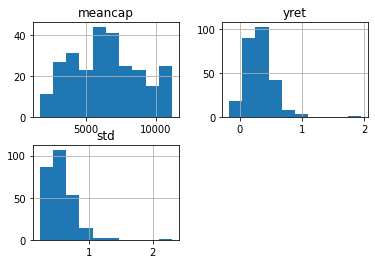

In [42]:
small.hist()

array([[<AxesSubplot:title={'center':'meancap'}>,
        <AxesSubplot:title={'center':'yret'}>],
       [<AxesSubplot:title={'center':'std'}>, <AxesSubplot:>]],
      dtype=object)

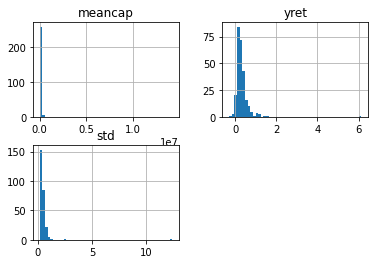

In [43]:
big.hist(bins=50)

# Extract sectors

In [44]:
qualities = pd.read_csv('data/SPX/qualities_SPXmod.csv')
qualities.head()

,ticker,n_gics_1,company_name
0,BKR UN Equity,Energy,Baker Hughes Co
1,J UN Equity,Industrials,Jacobs Engineering Group Inc
2,VAL UN Equity,Energy,Valaris plc
3,SPX Index,NaN,S&P 500 INDEX
4,REG UW Equity,Real Estate,Regency Centers Corp


In [45]:
sectors = list(qualities['n_gics_1'].dropna().unique())
sectors

['Energy',
 'Industrials',
 'Real Estate',
 'Financials',
 'Information Technology',
 'Consumer Discretionary',
 'Health Care',
 'Materials',
 'Utilities',
 'Communication Services',
 'Consumer Staples']

In [46]:
industries = {}
for s in sectors:
    tickers_s = [t[0] for t in qualities[['ticker', 'n_gics_1']].to_numpy() if t[1]==s]
    industries[s] = {}
    small_s = small[small.index.isin(tickers_s)]
    big_s = big[big.index.isin(tickers_s)]
    industries[s]['big'] = big_s
    industries[s]['small'] = small_s 

In [47]:
industries

{'Energy': {'big':                      meancap      yret        std
  BKR UN Equity   21794.083185  0.212447   0.658270
  NOV UN Equity   17777.245456  0.373811   0.642074
  NBL UN Equity   12729.621252  0.321886   0.503407
  PXD UN Equity   13599.704875  0.449127   0.571574
  EOG UN Equity   30726.364825  0.452536   0.505233
  VLO UN Equity   22643.949520  0.525335   0.717473
  APA UN Equity   25687.093062  0.087892   0.503947
  COP UN Equity   79292.950061  0.126382   0.414709
  RIG UN Equity   16191.998118  6.140196  12.366213
  APC UN Equity   29076.636805  0.211544   0.552489
  OXY UN Equity   52785.986915  0.353074   0.474128
  XOM UN Equity  366848.645741  0.178674   0.305803
  MRO UN Equity   20726.899838  0.139264   0.618045
  CVX UN Equity  173482.187197  0.196169   0.355848
  WMB UN Equity   18235.588827  0.325988   0.562291
  HES UN Equity   17648.076106  0.301572   0.641858
  SLB UN Equity   84992.514063  0.353471   0.633668
  HAL UN Equity   31749.195083  0.347391   0.60

In [48]:
industries["Energy"]["big"]

,meancap,yret,std
BKR UN Equity,21794.083185,0.212447,0.658270
NOV UN Equity,17777.245456,0.373811,0.642074
NBL UN Equity,12729.621252,0.321886,0.503407
PXD UN Equity,13599.704875,0.449127,0.571574
EOG UN Equity,30726.364825,0.452536,0.505233
VLO UN Equity,22643.949520,0.525335,0.717473
APA UN Equity,25687.093062,0.087892,0.503947
COP UN Equity,79292.950061,0.126382,0.414709
RIG UN Equity,16191.998118,6.140196,12.366213
APC UN Equity,29076.636805,0.211544,0.552489


# Strategy 1

## mean, std return for small + big in each sector

# Energy = EN

In [49]:
industries["Energy"].values()

dict_values([                     meancap      yret        std
BKR UN Equity   21794.083185  0.212447   0.658270
NOV UN Equity   17777.245456  0.373811   0.642074
NBL UN Equity   12729.621252  0.321886   0.503407
PXD UN Equity   13599.704875  0.449127   0.571574
EOG UN Equity   30726.364825  0.452536   0.505233
VLO UN Equity   22643.949520  0.525335   0.717473
APA UN Equity   25687.093062  0.087892   0.503947
COP UN Equity   79292.950061  0.126382   0.414709
RIG UN Equity   16191.998118  6.140196  12.366213
APC UN Equity   29076.636805  0.211544   0.552489
OXY UN Equity   52785.986915  0.353074   0.474128
XOM UN Equity  366848.645741  0.178674   0.305803
MRO UN Equity   20726.899838  0.139264   0.618045
CVX UN Equity  173482.187197  0.196169   0.355848
WMB UN Equity   18235.588827  0.325988   0.562291
HES UN Equity   17648.076106  0.301572   0.641858
SLB UN Equity   84992.514063  0.353471   0.633668
HAL UN Equity   31749.195083  0.347391   0.606979,                     meancap      yre

-------------

In [50]:
# Return portfolio b
p_r_EN_s = np.sum(industries["Energy"]["small"]["yret"]) / len(industries["Energy"]["small"]["yret"])
p_r_EN_s

0.25469357407331367

In [51]:
#Return portfolio a
p_r_EN_b = np.sum(industries["Energy"]["big"]["yret"]) /len(industries["Energy"]["big"]["yret"])
p_r_EN_b

0.6164866209842621

In [52]:
#Compute portfolio b volatility
returns = industries["Energy"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Energy"]["small"]["yret"])
p_v_EN_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Energy"]["small"]["yret"])
p_v_EN_s

0.05643373072746033

In [53]:
#Compute portfolio a volatility
returns = industries["Energy"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Energy"]["big"]["yret"])
p_v_EN_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Energy"]["big"]["yret"])
p_v_EN_b

0.8531514801798055

In [54]:
# Efficiency small

eff_EN_s = p_r_EN_s / p_v_EN_s
eff_EN_s

4.513144369336922

In [55]:
# Efficiency big

eff_EN_b = p_r_EN_b / p_v_EN_b
eff_EN_b

0.7225992514885338

In [56]:

for el1 in industries["Energy"].keys():
 tot = industries["Energy"][el1]["yret"].std() 


print(tot)

0.22157500805739158


In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Industrials = IN

In [58]:
#Return portfolio a1 
p_r_IN_b = np.sum(industries["Industrials"]["big"]["yret"]) / len(industries["Industrials"]["big"]["yret"])
p_r_IN_b

0.27891591833519935

In [59]:
#Return portfolio b1 
p_r_IN_s = np.sum(industries["Industrials"]["small"]["yret"]) / len(industries["Industrials"]["small"]["yret"])
p_r_IN_s

0.35801558280305024

In [60]:
#Compute portfolio a1 volatility
returns = industries["Industrials"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Industrials"]["big"]["yret"]) 
p_v_IN_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Industrials"]["big"]["yret"])
p_v_IN_b 

0.032965115610135286

In [61]:
#Compute portfolio b1 volatility
returns = industries["Industrials"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Industrials"]["small"]["yret"])
p_v_IN_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Industrials"]["small"]["yret"])
p_v_IN_s 

0.061771556826798746

In [62]:
# Efficiency big

eff_IN_b = p_r_IN_b / p_v_IN_b
eff_IN_b

8.460941609725321

In [63]:
# Efficiency small

eff_IN_s = p_r_IN_s / p_v_IN_s
eff_IN_s

5.795799898760688

# Real Estate = RE

In [64]:
#Return portfolio big
p_r_RE_b = np.sum(industries["Real Estate"]["big"]["yret"]) / len(industries["Real Estate"]["big"]["yret"])
p_r_RE_b

0.3153579776641309

In [65]:
#Return portfolio small
p_r_RE_s = np.sum(industries["Real Estate"]["small"]["yret"]) / len(industries["Real Estate"]["small"]["yret"])
p_r_RE_s

0.2589123371950268

In [66]:
#Compute portfolio big volatility
returns = industries["Real Estate"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Real Estate"]["big"]["yret"]) 
p_v_RE_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Real Estate"]["big"]["yret"])
p_v_RE_b 

0.045197291121184334

In [67]:
#Compute portfolio small volatility
returns = industries["Real Estate"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Real Estate"]["small"]["yret"]) 
p_v_RE_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Real Estate"]["small"]["yret"])
p_v_RE_s 

0.04863442657709458

In [68]:
# Efficiency big

eff_RE_b = p_r_RE_b / p_v_RE_b
eff_RE_b

6.977364568566368

In [69]:
# Efficiency small

eff_RE_s = p_r_RE_s / p_v_RE_s
eff_RE_s

5.323643258846751

# Financials = FI

In [70]:
#Return portfolio big
p_r_FI_b = np.sum(industries["Financials"]["big"]["yret"]) / len(industries["Financials"]["big"]["yret"])
p_r_FI_b

0.17341476083973006

In [71]:
#Return portfolio small
p_r_FI_s = np.sum(industries["Financials"]["small"]["yret"]) / len(industries["Financials"]["small"]["yret"])
p_r_FI_s

0.16005889016828367

In [72]:
#Compute portfolio big volatility
returns = industries["Financials"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Financials"]["big"]["yret"]) 
p_v_FI_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Financials"]["big"]["yret"])
p_v_FI_b

0.025896834253767577

In [73]:
#Compute portfolio small volatility
returns = industries["Financials"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Financials"]["small"]["yret"]) 
p_v_FI_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Financials"]["small"]["yret"])
p_v_FI_s

0.021446806615734046

In [74]:
# Efficiency big

eff_FI_b = p_r_FI_b / p_v_FI_b
eff_FI_b

6.6963691059844885

In [75]:
# Efficiency small

eff_FI_s = p_r_FI_s / p_v_FI_s
eff_FI_s

7.463063990648355

# Information Technology = IT

In [76]:
#Return portfolio big
p_r_IT_b = np.sum(industries["Information Technology"]["big"]["yret"]) / len(industries["Information Technology"]["big"]["yret"])
p_r_IT_b

0.3113216812187448

In [77]:
#Return portfolio small
p_r_IT_s = np.sum(industries["Information Technology"]["small"]["yret"]) / len(industries["Information Technology"]["small"]["yret"])
p_r_IT_s

0.35359617541883565

In [78]:
#Compute portfolio big volatility
returns = industries["Information Technology"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Information Technology"]["big"]["yret"]) 
p_v_IT_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Information Technology"]["big"]["yret"])
p_v_IT_b

0.08325095820079646

In [79]:
#Compute portfolio small volatility
returns = industries["Information Technology"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Information Technology"]["small"]["yret"]) 
p_v_IT_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Information Technology"]["small"]["yret"])
p_v_IT_s

0.07323060631250285

In [80]:
# Efficiency big

eff_IT_b = p_r_IT_b / p_v_IT_b
eff_IT_b

3.7395567324024674

In [81]:
# Efficiency small

eff_IT_s = p_r_IT_s / p_v_IT_s
eff_IT_s

4.828529944295508

# Consumer Discretionary = CD

In [82]:
#Return portfolio big
p_r_CD_b = np.sum(industries["Consumer Discretionary"]["big"]["yret"]) / len(industries["Consumer Discretionary"]["big"]["yret"])
p_r_CD_b

0.4595532833946811

In [83]:
#Return portfolio small
p_r_CD_s = np.sum(industries["Consumer Discretionary"]["small"]["yret"]) / len(industries["Consumer Discretionary"]["small"]["yret"])
p_r_CD_s

0.32621932182605085

In [84]:
#Compute portfolio big volatility
returns = industries["Consumer Discretionary"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Consumer Discretionary"]["big"]["yret"]) 
p_v_CD_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Consumer Discretionary"]["big"]["yret"])
p_v_CD_b

0.15729901829692278

In [85]:
#Compute portfolio small volatility
returns = industries["Consumer Discretionary"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Consumer Discretionary"]["small"]["yret"]) 
p_v_CD_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Consumer Discretionary"]["small"]["yret"])
p_v_CD_s

0.055244394955047446

In [86]:
# Efficiency big

eff_CD_b = p_r_CD_b / p_v_CD_b
eff_CD_b

2.9215267098947386

In [87]:
# Efficiency small

eff_CD_s = p_r_CD_s / p_v_CD_s
eff_CD_s

5.905021171677174

# Health Care = HC

In [88]:
#Return portfolio big
p_r_HC_b = np.sum(industries["Health Care"]["big"]["yret"]) / len(industries["Health Care"]["big"]["yret"])
p_r_HC_b

0.4650602269088438

In [89]:
#Return portfolio small
p_r_HC_s = np.sum(industries["Health Care"]["small"]["yret"]) / len(industries["Health Care"]["small"]["yret"])
p_r_HC_s

0.42286553340631644

In [90]:
#Compute portfolio big volatility
returns = industries["Health Care"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Health Care"]["big"]["yret"]) 
p_v_HC_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Health Care"]["big"]["yret"])
p_v_HC_b

0.15664850972255723

In [91]:
#Compute portfolio small volatility
returns = industries["Health Care"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Health Care"]["small"]["yret"]) 
p_v_HC_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Health Care"]["small"]["yret"])
p_v_HC_s

0.102201335910702

In [92]:
# Efficiency big

eff_HC_b = p_r_HC_b / p_v_HC_b
eff_HC_b

2.968813605265187

In [93]:
# Efficiency small

eff_HC_s = p_r_HC_s / p_v_HC_s
eff_HC_s

4.1375734440085346

# Materials = MA

In [94]:
#Return portfolio big
p_r_MA_b = np.sum(industries["Materials"]["big"]["yret"]) / len(industries["Materials"]["big"]["yret"])
p_r_MA_b

0.214219275400793

In [95]:
#Return portfolio small
p_r_MA_s = np.sum(industries["Materials"]["small"]["yret"]) / len(industries["Materials"]["small"]["yret"])
p_r_MA_s

0.28173724641287995

In [96]:
#Compute portfolio big volatility
returns = industries["Materials"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Materials"]["big"]["yret"]) 
p_v_MA_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Materials"]["big"]["yret"])
p_v_MA_b

0.03292755755892611

In [97]:
#Compute portfolio small volatility
returns = industries["Materials"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Materials"]["small"]["yret"]) 
p_v_MA_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Materials"]["small"]["yret"])
p_v_MA_s

0.03188525716031033

In [98]:
# Efficiency big

eff_MA_b = p_r_MA_b / p_v_MA_b
eff_MA_b

6.505774836698197

In [99]:
# Efficiency small

eff_MA_s = p_r_MA_s / p_v_MA_s
eff_MA_s

8.835972217391328

# Utilities = UT

In [100]:
#Return portfolio big
p_r_UT_b = np.sum(industries["Utilities"]["big"]["yret"]) / len(industries["Utilities"]["big"]["yret"])
p_r_UT_b

0.1749306267042415

In [101]:
#Return portfolio small
p_r_UT_s = np.sum(industries["Utilities"]["small"]["yret"]) / len(industries["Utilities"]["small"]["yret"])
p_r_UT_s

0.22213858869547273

In [102]:
#Compute portfolio big volatility
returns = industries["Utilities"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Utilities"]["big"]["yret"]) 
p_v_UT_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Utilities"]["big"]["yret"])
p_v_UT_b

0.015194191228119151

In [103]:
#Compute portfolio small volatility
returns = industries["Utilities"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Utilities"]["small"]["yret"]) 
p_v_UT_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Utilities"]["small"]["yret"])
p_v_UT_s

0.018649573330594003

In [104]:
# Efficiency big

eff_UT_b = p_r_UT_b / p_v_UT_b
eff_UT_b

11.512993622227546

In [105]:
# Efficiency small

eff_UT_s = p_r_UT_s / p_v_UT_s
eff_UT_s

11.911188784735455

# Communication Services = CSe

In [106]:
#Return portfolio big
p_r_CSe_b = np.sum(industries["Communication Services"]["big"]["yret"]) / len(industries["Communication Services"]["big"]["yret"])
p_r_CSe_b

0.361951452052094

In [107]:
#Return portfolio small
p_r_CSe_s = np.sum(industries["Communication Services"]["small"]["yret"]) / len(industries["Communication Services"]["small"]["yret"])
p_r_CSe_s

0.17582327490904012

In [108]:
#Compute portfolio big volatility
returns = industries["Communication Services"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Communication Services"]["big"]["yret"]) 
p_v_CSe_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Communication Services"]["big"]["yret"])
p_v_CSe_b

0.10490152491484929

In [109]:
#Compute portfolio small volatility
returns = industries["Communication Services"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Communication Services"]["small"]["yret"]) 
p_v_CSe_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Communication Services"]["small"]["yret"])
p_v_CSe_s

0.02954753624737689

In [110]:
# Efficiency big

eff_CSe_b = p_r_CSe_b / p_v_CSe_b
eff_CSe_b

3.4503926644145295

In [111]:
# Efficiency small

eff_CSe_s = p_r_CSe_s / p_v_CSe_s
eff_CSe_s

5.950522352761273

# Consumer Staples = CSt

In [112]:
#Return portfolio big
p_r_CSt_b = np.sum(industries["Consumer Staples"]["big"]["yret"]) / len(industries["Consumer Staples"]["big"]["yret"])
p_r_CSt_b

0.2623175769802125

In [113]:
#Return portfolio small
p_r_CSt_s = np.sum(industries["Consumer Staples"]["small"]["yret"]) / len(industries["Consumer Staples"]["small"]["yret"])
p_r_CSt_s

0.5198865242426077

In [114]:
#Compute portfolio big volatility
returns = industries["Consumer Staples"]["big"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Consumer Staples"]["big"]["yret"]) 
p_v_CSt_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Consumer Staples"]["big"]["yret"])
p_v_CSt_b

0.03528994626319204

In [115]:
#Compute portfolio small volatility
returns = industries["Consumer Staples"]["small"]["yret"]
covariance = np.cov(returns.T)

#print(covariance)

portfolio = np.sum(industries["Consumer Staples"]["small"]["yret"]) 
p_v_CSt_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries["Consumer Staples"]["small"]["yret"])
p_v_CSt_s

0.30755239426366443

In [116]:
# Efficiency big

eff_CSt_b = p_r_CSt_b / p_v_CSt_b
eff_CSt_b

7.43320987297206

In [117]:
# Efficiency small

eff_CSt_s = p_r_CSt_s / p_v_CSt_s
eff_CSt_s

1.690399860119149

# _START PLOTTING GRAPHS_

# RETURN

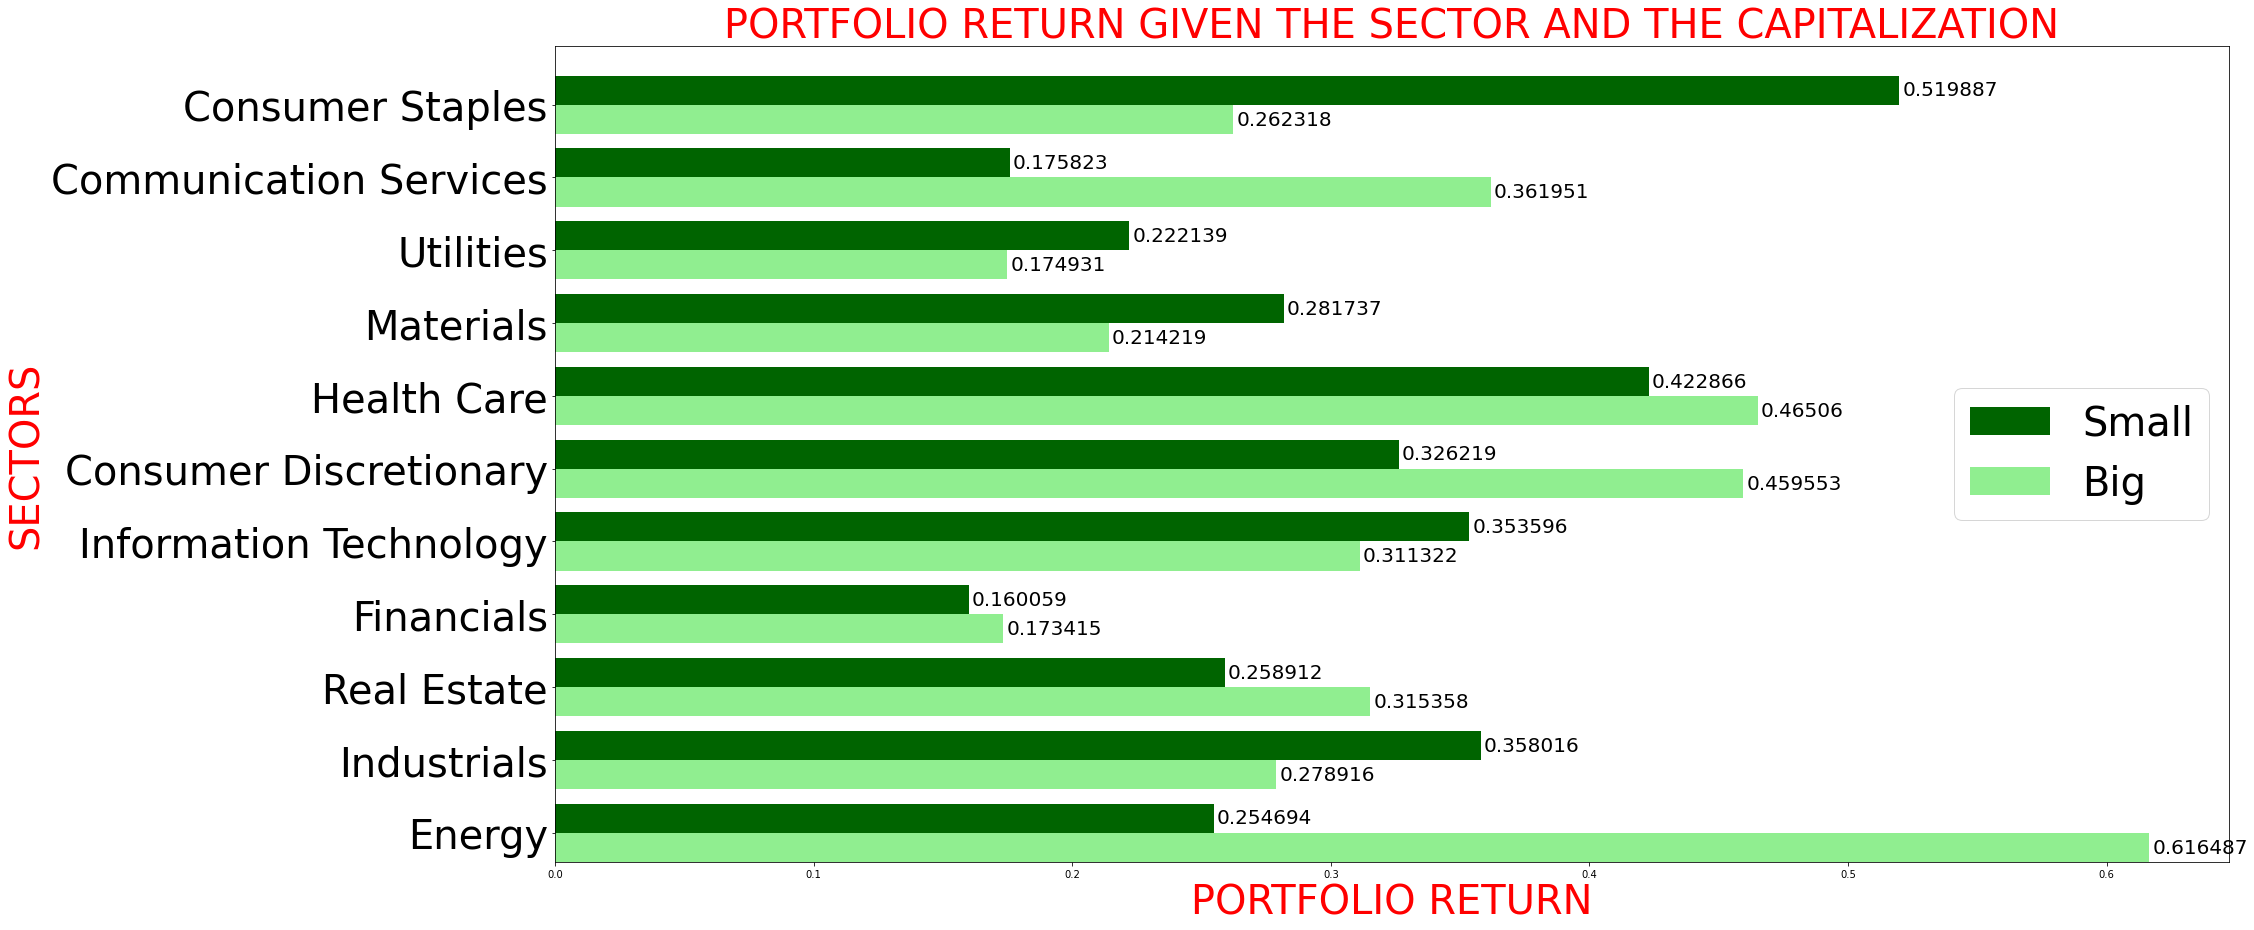

In [118]:
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]

small = [p_r_EN_s, p_r_IN_s, p_r_RE_s, p_r_FI_s, p_r_IT_s, 
         p_r_CD_s, p_r_HC_s, p_r_MA_s, p_r_UT_s, p_r_CSe_s, p_r_CSt_s]

big = [p_r_EN_b, p_r_IN_b, p_r_RE_b, p_r_FI_b, p_r_IT_b, 
       p_r_CD_b, p_r_HC_b, p_r_MA_b, p_r_UT_b, p_r_CSe_b, p_r_CSt_b]




ind = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(30, 15))

rects1 = ax.barh(ind + width, small, width, color='darkgreen', label='Small')
rects2 = ax.barh(ind, big, width, color='lightgreen', label='Big')


ax.set(yticks=ind + width/2, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend(fontsize=40, loc = 5)

ax.set_yticklabels(labels, fontsize=40)



ax.bar_label(rects1, padding=3, size = 20)
ax.bar_label(rects2, padding=3, size = 20)


plt.xlabel('PORTFOLIO RETURN', size = 40, color = "red")
plt.ylabel ('SECTORS', size = 40, rotation = "vertical", color = "red")
plt.title("PORTFOLIO RETURN GIVEN THE SECTOR AND THE CAPITALIZATION",size = 40, color = "red" )

plt.show()

# VOLATILITY

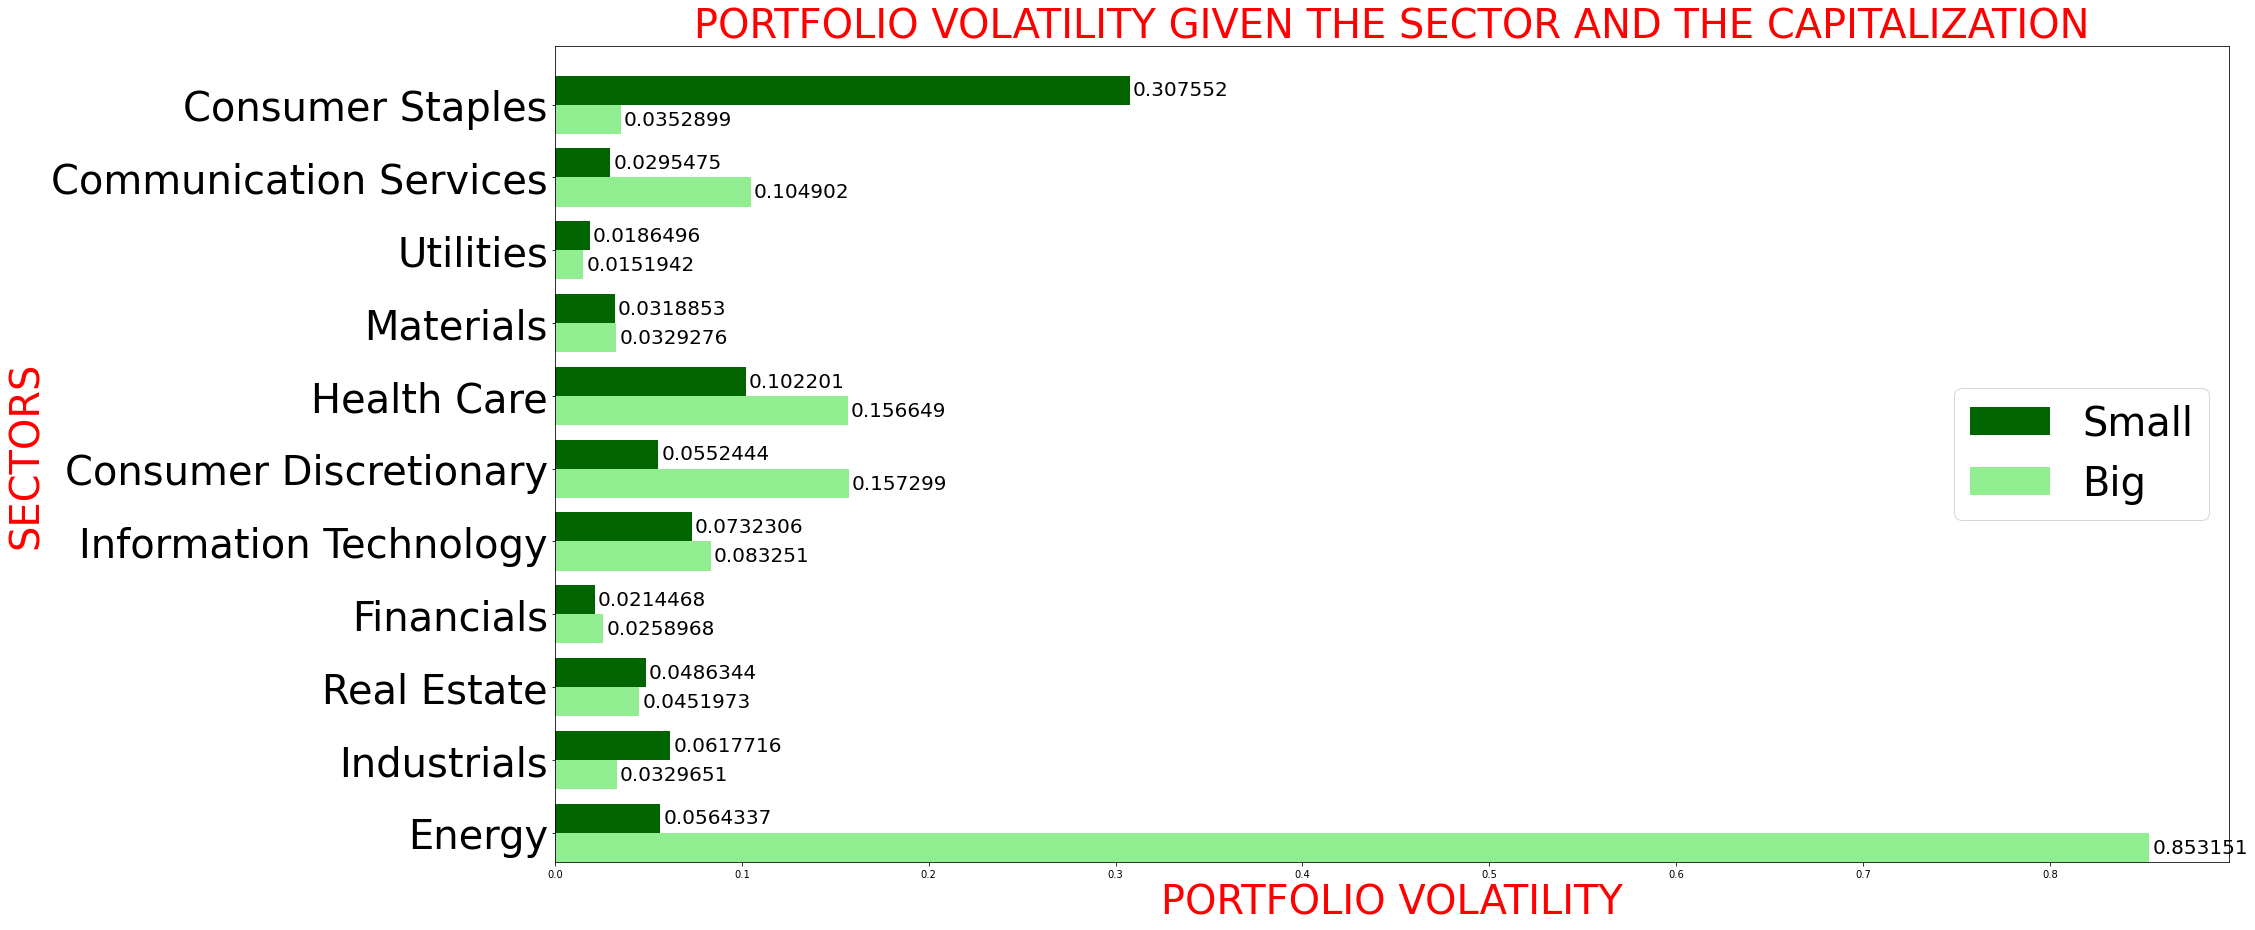

In [119]:
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]

small = [p_v_EN_s, p_v_IN_s, p_v_RE_s, p_v_FI_s, p_v_IT_s, 
         p_v_CD_s, p_v_HC_s, p_v_MA_s, p_v_UT_s, p_v_CSe_s, p_v_CSt_s]

big = [p_v_EN_b, p_v_IN_b, p_v_RE_b, p_v_FI_b, p_v_IT_b, 
       p_v_CD_b, p_v_HC_b, p_v_MA_b, p_v_UT_b, p_v_CSe_b, p_v_CSt_b]




ind = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(30, 15))

rects1 = ax.barh(ind + width, small, width, color='darkgreen', label='Small')
rects2 = ax.barh(ind, big, width, color='lightgreen', label='Big')


ax.set(yticks=ind + width/2, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend(fontsize=40, loc = 5)

ax.set_yticklabels(labels, fontsize=40)



ax.bar_label(rects1, padding=3, size = 20)
ax.bar_label(rects2, padding=3, size = 20)


plt.xlabel('PORTFOLIO VOLATILITY', size = 40, color = "red")
plt.ylabel ('SECTORS', size = 40, rotation = "vertical", color = "red")
plt.title("PORTFOLIO VOLATILITY GIVEN THE SECTOR AND THE CAPITALIZATION",size = 40, color = "red" )

plt.show()

# TOT VOL & RET Holding Sector Constant

In [120]:
EN = [p_v_EN_s, p_v_EN_b]
IN = [p_v_IN_s, p_v_IN_b]
RE = [p_v_RE_s, p_v_RE_b]
FI = [p_v_FI_s, p_v_FI_b]
IT = [p_v_IT_s, p_v_IT_b]
CD = [p_v_CD_s, p_v_CD_b]
HC = [p_v_HC_s, p_v_HC_b]
MA = [p_v_MA_s, p_v_MA_b]
UT = [p_v_UT_s, p_v_UT_b]
CSe = [p_v_CSe_s, p_v_CSe_b]
CSt = [p_v_CSt_s, p_v_CSt_b]

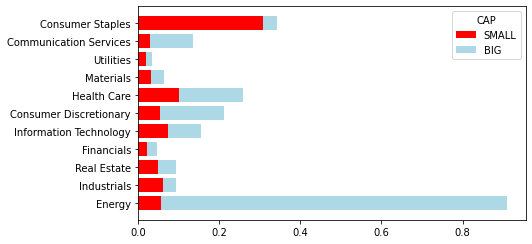

In [121]:
# VOLATILITY with SECTOR CONSTANT

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#year = [2014, 2015, 2016, 2017, 2018, 2019]
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]
#issues_addressed = [10, 14, 0, 10, 15, 15]
volS = [p_v_EN_s, p_v_IN_s, p_v_RE_s, p_v_FI_s, p_v_IT_s, p_v_CD_s, p_v_HC_s, p_v_MA_s, p_v_UT_s, p_v_CSe_s, p_v_CSt_s]
volB = [p_v_EN_b, p_v_IN_b, p_v_RE_b, p_v_FI_b, p_v_IT_b, p_v_CD_b, p_v_HC_b, p_v_MA_b, p_v_UT_b, p_v_CSe_b, p_v_CSt_b]
#issues_pending = [5, 10, 50, 2, 0, 10]

b1 = plt.barh(labels, volS, color="red")

b2 = plt.barh(labels, volB, left=volS, color="lightblue")

plt.legend([b1, b2], ["SMALL", "BIG"], title="CAP", loc="upper right")

plt.show()

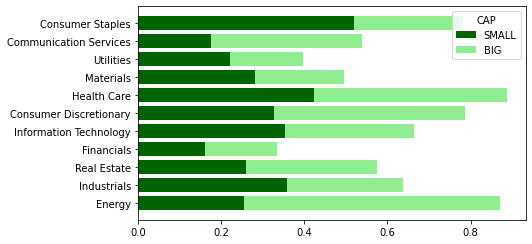

In [122]:
# RETURN with SECTOR CONSTANT



from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

#year = [2014, 2015, 2016, 2017, 2018, 2019]
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]
#issues_addressed = [10, 14, 0, 10, 15, 15]
retS = [p_r_EN_s, p_r_IN_s, p_r_RE_s, p_r_FI_s, p_r_IT_s, p_r_CD_s, p_r_HC_s, p_r_MA_s, p_r_UT_s, p_r_CSe_s, p_r_CSt_s]
retB = [p_r_EN_b, p_r_IN_b, p_r_RE_b, p_r_FI_b, p_r_IT_b, p_r_CD_b, p_r_HC_b, p_r_MA_b, p_r_UT_b, p_r_CSe_b, p_r_CSt_b]
#issues_pending = [5, 10, 50, 2, 0, 10]

b1 = plt.barh(labels, retS, color="darkgreen")

b2 = plt.barh(labels, retB, left=retS, color="lightgreen")

plt.legend([b1, b2], ["SMALL", "BIG"], title="CAP", loc="upper right")

plt.show()

In [123]:
CSt

[0.30755239426366443, 0.03528994626319204]

In [124]:
# TOT VOL BIG
tot_big = np.sum(big)
tot_big

1.5427224273502556

In [125]:
# TOT VOL SMALL

tot_small = np.sum(small)
tot_small

0.8065976189272857

In [126]:
small2 = [p_r_EN_s, p_r_IN_s, p_r_RE_s, p_r_FI_s, p_r_IT_s, 
         p_r_CD_s, p_r_HC_s, p_r_MA_s, p_r_UT_s, p_r_CSe_s, p_r_CSt_s]

big2 = [p_r_EN_b, p_r_IN_b, p_r_RE_b, p_r_FI_b, p_r_IT_b, 
       p_r_CD_b, p_r_HC_b, p_r_MA_b, p_r_UT_b, p_r_CSe_b, p_r_CSt_b]

In [127]:
# TOT RET BIG
tot_big2 = np.sum(big2)
tot_big2

3.633529400482933

In [128]:
# TOT RET SMALL

tot_small2 = np.sum(small2)
tot_small2

3.333947049150878

# EFFICIENCY

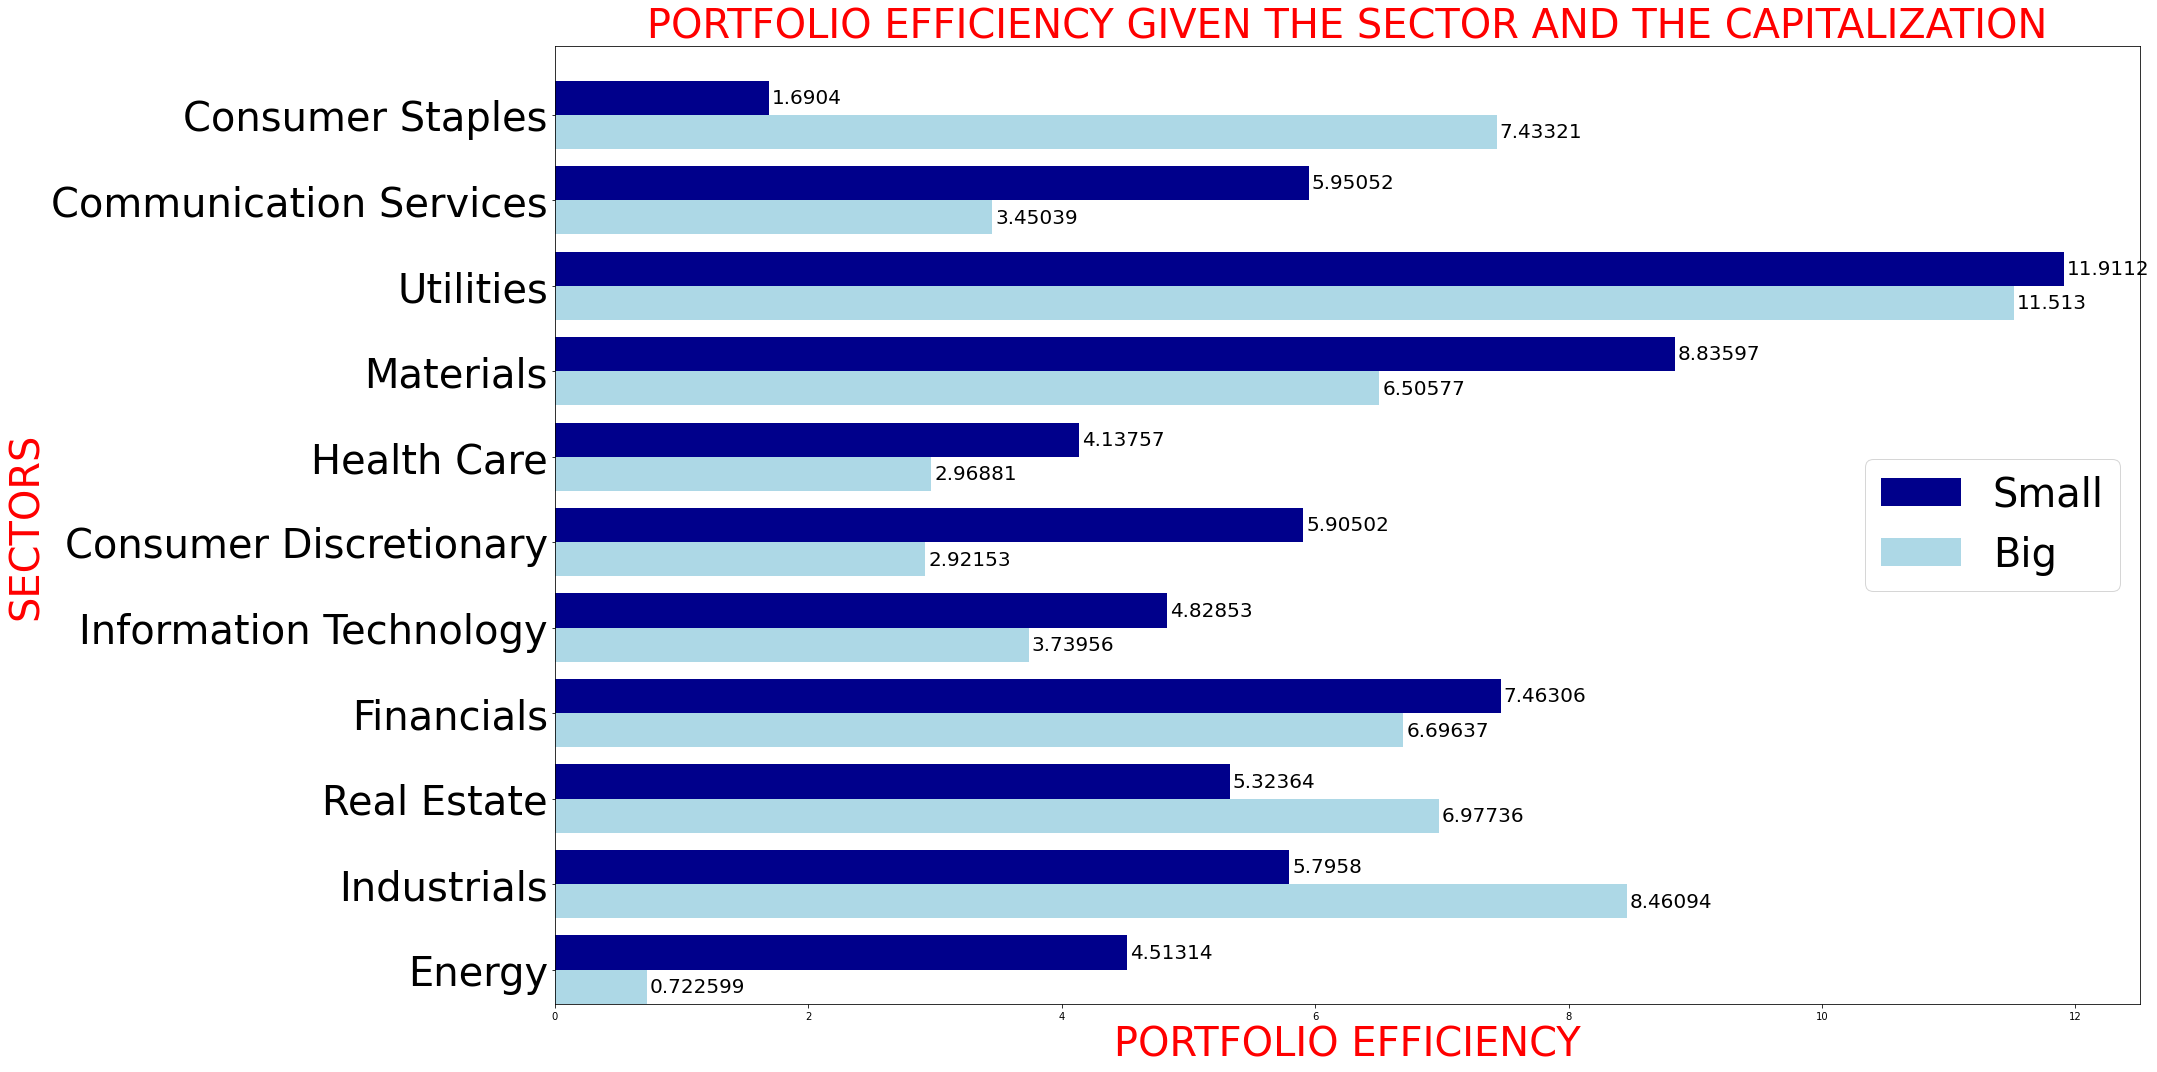

In [129]:
labels = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]

Eff_s = [eff_EN_s, eff_IN_s, eff_RE_s, eff_FI_s, eff_IT_s, eff_CD_s, eff_HC_s, 
        eff_MA_s, eff_UT_s, eff_CSe_s, eff_CSt_s]
         
Eff_b = [eff_EN_b, eff_IN_b, eff_RE_b, eff_FI_b, eff_IT_b, eff_CD_b, eff_HC_b,
        eff_MA_b, eff_UT_b, eff_CSe_b, eff_CSt_b]
         


ind = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots(figsize=(30, 15))

rects1 = ax.barh(ind + width, Eff_s, width, color='darkblue', label='Small')
rects2 = ax.barh(ind, Eff_b, width, color='lightblue', label='Big')


ax.set(yticks=ind + width/2, yticklabels=labels, ylim=[2*width - 1, len(labels)])
ax.legend(fontsize=40, loc = 5)

ax.set_yticklabels(labels, fontsize=40)

ax.bar_label(rects1, padding=3, size = 20)
ax.bar_label(rects2, padding=3, size = 20)

plt.xlabel('PORTFOLIO EFFICIENCY', size = 40, color = "red")
plt.ylabel ('SECTORS', size = 40, rotation = "vertical", color = "red")
plt.title("PORTFOLIO EFFICIENCY GIVEN THE SECTOR AND THE CAPITALIZATION",size = 40, color = "red" )

plt.show()

# TEST

# Strategy 2
## Mean, std return for small or big companies across sectors
## Holding Market Cap Constant


In [130]:
import numpy as np

In [132]:
# LIST of RETURNs FOR each BIG CAP ACROSS SECTORS
list_r_b = []
for elemento in industries.keys():
    p_r_TOT_b = np.sum(industries[elemento]["big"]["yret"]) / len(industries[elemento]["big"]["yret"])
    list_r_b.append(p_r_TOT_b)
#print(list1)       
        #print(p_r_TOT_b)
list_r_b_tot = np.sum(list_r_b)    
list_r_b_tot

3.633529400482933

In [133]:
# List Volatility Big
list_v_b=[]

for elemento in industries.keys():

    returns = industries[elemento]["big"]["yret"]
    covariance = np.cov(returns.T)
    portfolio = np.sum(industries[elemento]["big"]["yret"])
    p_vol_TOT_b = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries[elemento]["big"]["yret"])
    list_v_b.append(p_vol_TOT_b)
    #p_vol_TOT_b
print(list_v_b)
list_v_b_tot = np.sum(list_v_b)
list_v_b_tot

[0.8531514801798055, 0.032965115610135286, 0.045197291121184334, 0.025896834253767577, 0.08325095820079646, 0.15729901829692278, 0.15664850972255723, 0.03292755755892611, 0.015194191228119151, 0.10490152491484929, 0.03528994626319204]


1.5427224273502556

### SMALL

In [134]:
# LIST of RETURNs FOR each SMALL CAP ACROSS SECTORS

list_r_s=[]
for elemento in industries.keys():
    p_r_TOT_s = np.sum(industries[elemento]["small"]["yret"]) / len(industries[elemento]["small"]["yret"])
    list_r_s.append(p_r_TOT_s)
print(list_r_s)

list_r_s_tot = np.sum(list_r_s)
list_r_s_tot
   

[0.25469357407331367, 0.35801558280305024, 0.2589123371950268, 0.16005889016828367, 0.35359617541883565, 0.32621932182605085, 0.42286553340631644, 0.28173724641287995, 0.22213858869547273, 0.17582327490904012, 0.5198865242426077]


3.333947049150878

In [135]:
# List Small
list_v_s = []
for elemento in industries.keys():

    returns = industries[elemento]["small"]["yret"]
    covariance = np.cov(returns.T)
    portfolio = np.sum(industries[elemento]["small"]["yret"])
    p_vol_TOT_s = np.sqrt(np.dot(np.dot(portfolio, covariance), portfolio.T)) / len(industries[elemento]["small"]["yret"])
    list_v_s.append(p_vol_TOT_s)
print(list_v_s)
list_v_s_tot = np.sum(list_v_s)
list_v_s_tot

[0.05643373072746033, 0.061771556826798746, 0.04863442657709458, 0.021446806615734046, 0.07323060631250285, 0.055244394955047446, 0.102201335910702, 0.03188525716031033, 0.018649573330594003, 0.02954753624737689, 0.30755239426366443]


0.8065976189272857

# PLOTTING GRAPHS

<Figure size 540x252 with 0 Axes>

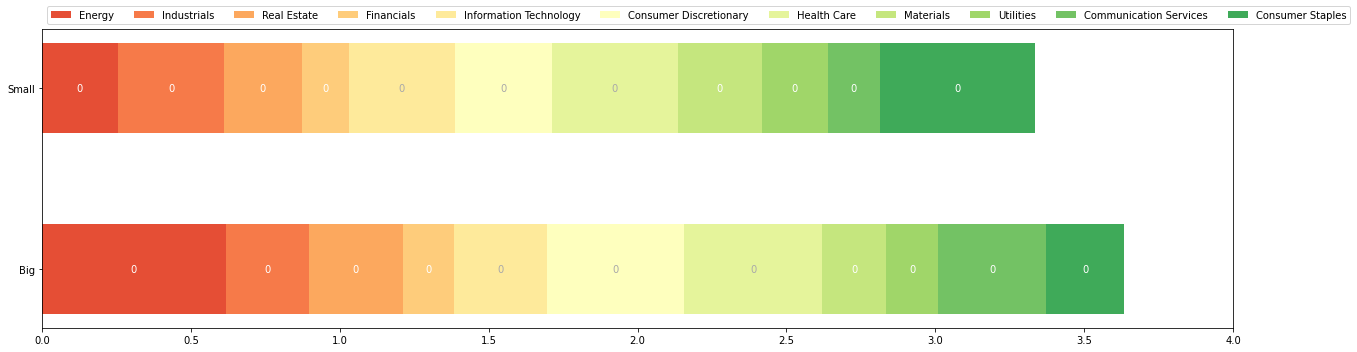

Text(0.5, 1.0, 'PORTFOLIO EFFICIENCY GIVEN THE SECTOR AND THE CAPITALIZATION')

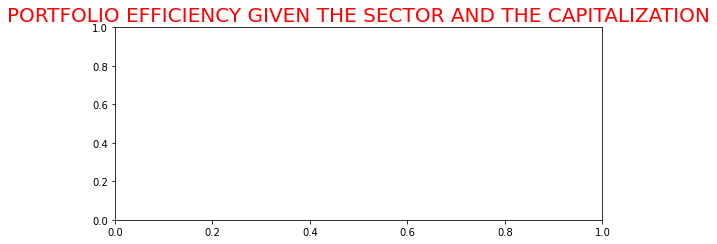

In [159]:
# RETURN

import numpy as np
import matplotlib.pyplot as plt


#category_names = ['Strongly disagree', 'Disagree',
 #                 'Neither agree nor disagree', 'Agree', 'Strongly agree']
label = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]
    
results = {
    'Small': list_r_s,
    'Big': list_r_b
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, 4, 0.5)

    for i, (colname, color) in enumerate(zip(label, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(label), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax


plt.tight_layout()
survey(results, label)
plt.show()
plt.title("PORTFOLIO EFFICIENCY GIVEN THE SECTOR AND THE CAPITALIZATION",size = 20, color = "red")

<Figure size 540x252 with 0 Axes>

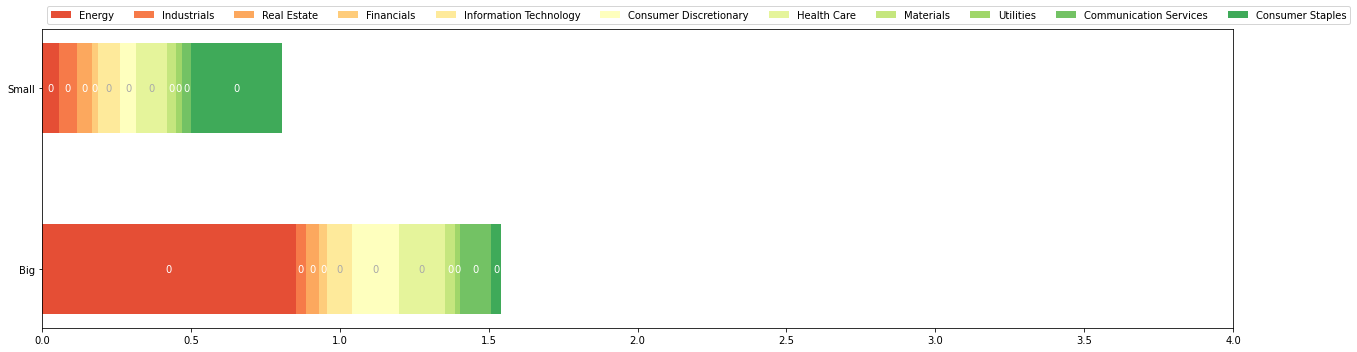

In [137]:
# Volatility

label = ["Energy", "Industrials", "Real Estate", "Financials", "Information Technology", 
          "Consumer Discretionary", "Health Care", "Materials", "Utilities", 
          "Communication Services", "Consumer Staples"]
    
results = {
    'Small': list_v_s,
    'Big': list_v_b
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(20, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, 4, 0.5)

    for i, (colname, color) in enumerate(zip(label, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(label), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='medium')

    return fig, ax

plt.tight_layout()
survey(results, label)
plt.show()

Efficiency

In [140]:
Eff = list_r_s_tot / list_v_s_tot
Eff

4.1333460091101895

In [141]:
Eff2 = list_r_b_tot / list_v_b_tot
Eff2

2.3552710040806235

# GRAPH of STRATEGY 2 : ACROSS SECTORS

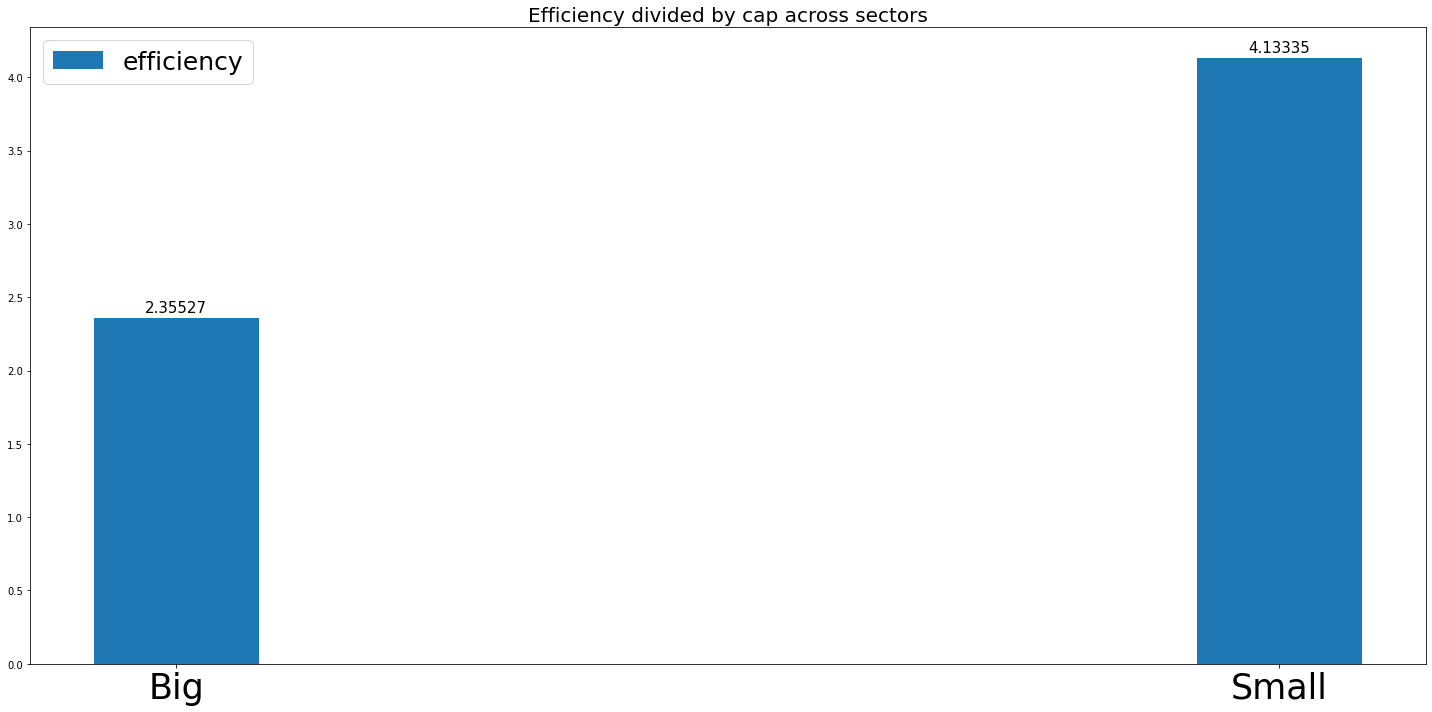

In [146]:
labels = ["Big", "Small"]
#returns = [p_r_TOT_b, p_r_TOT_s,]
#volatility = [p_vol_TOT_b, p_vol_TOT_s]
efficiency = [Eff2, Eff]

x = np.arange(len(labels))  # the label locations
width = 0.15  # the width of the bars



fig, ax = plt.subplots(figsize=(20, 10))
#rects1 = ax.bar(x - width, returns, width, label='returns')
#rects2 = ax.bar(x, volatility, width, label='volatility')
rects3 = ax.bar(x, efficiency, width, label='efficiency')



tickvalues = range(0,len(labels))
#ax.set_ylabel('return', size = 20)
ax.set_title('Efficiency divided by cap across sectors', size=20)
#ax.set_xticks(x)
plt.xticks(ticks = tickvalues ,labels = labels, rotation = 'horizontal', fontsize=35)


ax.legend(fontsize=25)

#ax.bar_label(rects1, padding=3, size = 15)
#ax.bar_label(rects2, padding=3, size = 15)
ax.bar_label(rects3, padding=3, size = 15)


#fig.tight_layout()


plt.show()